In [53]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.preprocessing import StandardScaler



In [7]:
df=pd.read_csv('data.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [8]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [10]:
df.shape

(36, 5)

In [11]:
df.describe()


,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


## VISUALISATION


#### AVERAGE EMISSION BY  BRAND


<AxesSubplot:ylabel='Car'>

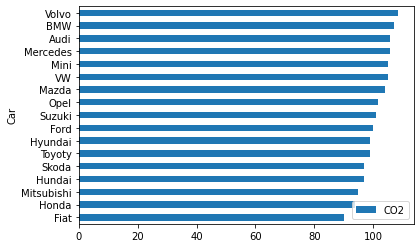

In [21]:
df.groupby('Car').agg(np.mean).sort_values(by='CO2',ascending=True).plot.barh(y='CO2')


- Volvo is the highst rank and Fiat is the lowest rank in average CO2.



#### AVERAGE VOLUME BY BRAND 

<AxesSubplot:ylabel='Car'>

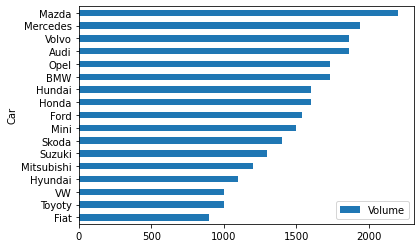

In [23]:
 df.groupby('Car').agg(np.mean).sort_values(by='Volume',ascending=True).plot.barh(y='Volume')


- Mazda is the highst rank and Fiat is the lowest rank in average Volume.



####  AVERAGE WEIGHT BY BRAND  

<AxesSubplot:ylabel='Car'>

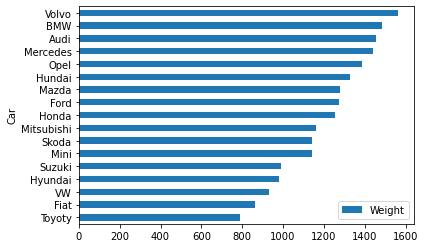

In [24]:
df.groupby('Car').agg(np.mean).sort_values(by='Weight',ascending=True).plot.barh(y='Weight')


- Volvo is the highst rank and Toyota is the lowest rank in average Weight.



#### PAIRPLOT BY  BRAND


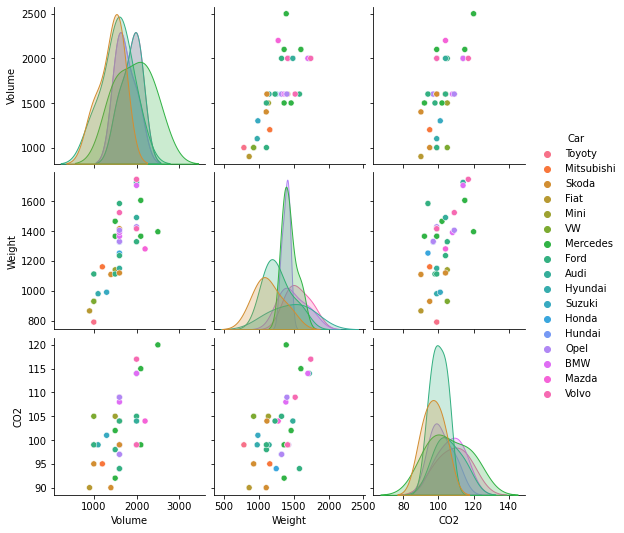

In [25]:
sns.pairplot(df,hue='Car')


#### CORRELATION HEATMAP
 

<AxesSubplot:>

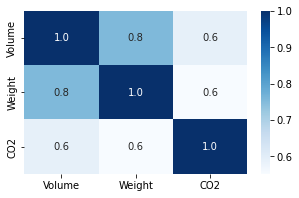

In [30]:
plt.figure(figsize = (5,3))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f',linecolor='white'
)


- Volume and Weight are strong positive correlation (0.8). And Both Volume and Weight are positive correlation with CO2 (0.6).



#### SCATTERPLOT WITH CO2, BRAND, VOLUME AND WEIGHT
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


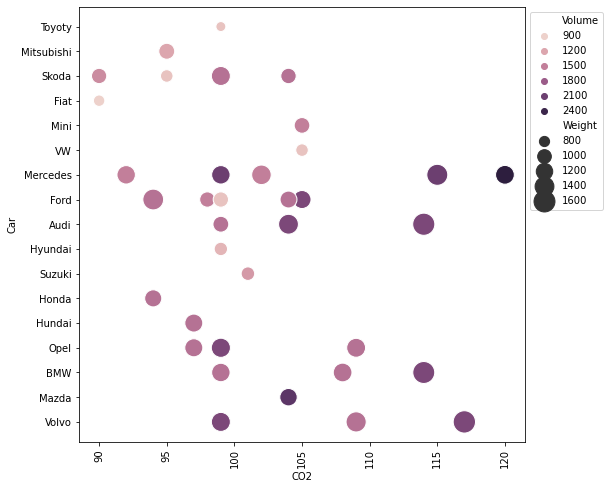

In [31]:
plt.figure(figsize=(8, 8))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(y=df['Car'],x=df['CO2'],hue=df['Volume'],size=df['Weight'],data=df,sizes=(100,500))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))


-  We can find many types of cars in Brand, Weight and Volume "below 95 g CO2/km".

 

#### USING CLASSIFICATION MODEL BY WEIGHT AND VOLUME TO FIND CARS WITH BELOW 95g CO2/km 

In [37]:
# Added new feature (target) which shows Buy:1 (CO2 less than 95) and Not Buy:0(CO2 avove 95)

def buy(em):
    if em >95:
        return 0
    else:
        return 1


In [38]:
df['Buy']=df['CO2'].apply(buy)


In [60]:
df1=df.drop(['CO2','Car','Model'],axis=1)


In [61]:
df1.head()


,Volume,Weight,Buy
0,1000,790,0
1,1200,1160,1
2,1000,929,1
3,900,865,1
4,1500,1140,0


In [62]:
# X (Explanatory variable and y (esponse variable)
X=df1.drop(['Buy'],axis=1)
y=df1['Buy']

In [63]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [64]:
# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [65]:
# comparing classifiers
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.005,probability=True),
    SVC(gamma=2, C=0.005,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


#### MODELS COMPARING
 

In [66]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


KNeighborsClassifier
****Results****
Accuracy: 84.6154%
Log Loss: 2.8349064621464066


C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The

SVC
****Results****
Accuracy: 92.3077%
Log Loss: 0.3653549598829625
SVC
****Results****
Accuracy: 92.3077%
Log Loss: 0.3984357862346564
GaussianProcessClassifier
****Results****
Accuracy: 84.6154%
Log Loss: 0.4023353900957387
DecisionTreeClassifier
****Results****
Accuracy: 76.9231%
Log Loss: 7.970486860364004
RandomForestClassifier
****Results****
Accuracy: 76.9231%
Log Loss: 2.998382666341534
MLPClassifier
****Results****
Accuracy: 76.9231%
Log Loss: 0.34213586423583536
AdaBoostClassifier
****Results****
Accuracy: 76.9231%

C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)



Log Loss: 0.5494044480276867
GaussianNB
****Results****
Accuracy: 76.9231%
Log Loss: 0.4891426044030433
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 84.6154%
Log Loss: 0.44713392957095244


C:\Users\kaund\AppData\Local\Temp\ipykernel_9776\215794405.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


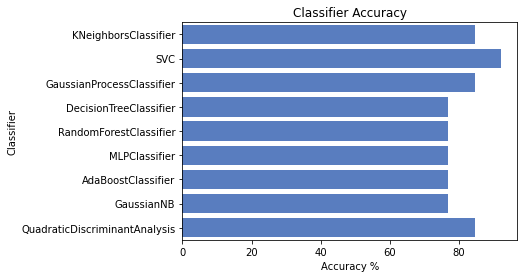

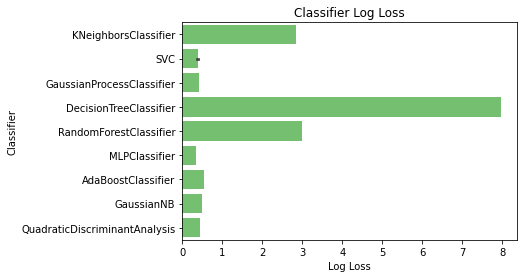

In [67]:
# Model comparing chart
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


In [68]:
# Modeling : Support Vector Machine
clf = SVC(kernel="linear", C=0.005,probability=True)

In [69]:
clf.fit(X, y)

SVC(C=0.005, kernel='linear', probability=True)

#### CONFUSION MATRIX


C:\Users\kaund\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


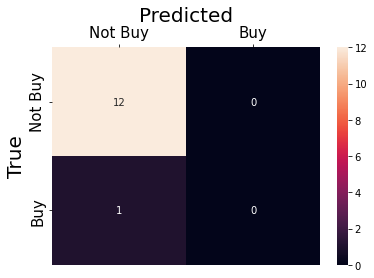

In [70]:
cm = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Not Buy', 'Buy'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Not Buy', 'Buy'], fontsize = 15)
plt.show()


### Conclusion
- We can see there are more cars we shouldn't buy because they have CO2 >95g/km